Imports

In [1]:
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
import hdbscan
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from tqdm import tqdm
import joblib

# Load reduced features
FEATURE_FILES = ["pca.npy"]

features_list = [np.load(f) for f in FEATURE_FILES]
features = np.concatenate(features_list, axis=1)
features = StandardScaler().fit_transform(features)

KMeans

In [2]:
# K-Means Clustering
print("Running K-Means Clustering...")
with tqdm(total=1, desc="K-Means") as pbar:
    kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
    kmeans_labels = kmeans.fit_predict(features)
    pbar.update(1)

# Compute silhouette score
sil_score = silhouette_score(features, kmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Save results
np.save("cluster_kmeans.npy", kmeans_labels)
print("K-Means clustering saved successfully.")

# Save K-Means model
joblib.dump(kmeans, "kmeans.pkl")
print(f"✅ Saved K-Means model to kmeans.pkl")

Running K-Means Clustering...


K-Means: 100%|██████████| 1/1 [00:00<00:00,  4.49it/s]


Silhouette Score: 0.5012
K-Means clustering saved successfully.
✅ Saved K-Means model to kmeans.pkl


Plot

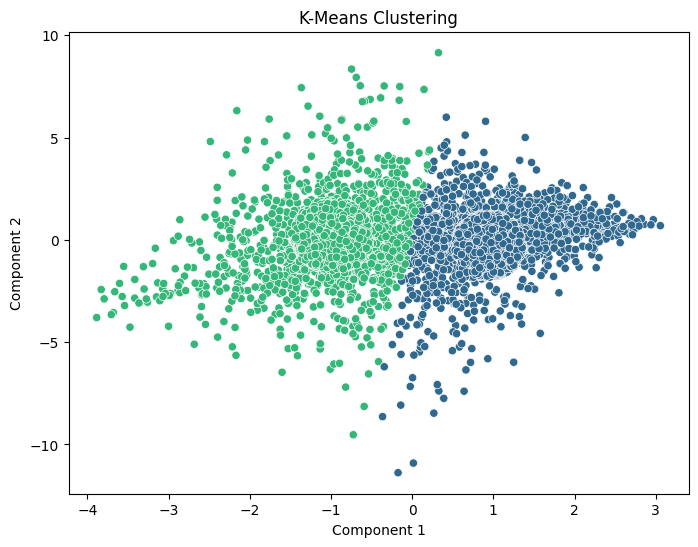

In [3]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=kmeans_labels, palette="viridis", legend=None)
plt.title("K-Means Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

MiniBatchKmeans

In [4]:
print("Running Mini-Batch K-Means Clustering...")
with tqdm(total=1, desc="Mini-Batch K-Means") as pbar:
    mbkmeans = MiniBatchKMeans(n_clusters=2, random_state=42, batch_size=256)
    mbkmeans_labels = mbkmeans.fit_predict(features)
    pbar.update(1)

# Compute silhouette score
sil_score = silhouette_score(features, mbkmeans_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Save results
np.save("cluster_mbkmeans.npy", mbkmeans_labels)
print("Mini-Batch K-Means clustering saved successfully.")

# Save K-Means model
joblib.dump(mbkmeans, "mbkmeans.pkl")
print(f"✅ Saved K-Means model to mbkmeans.pkl")

Running Mini-Batch K-Means Clustering...


Mini-Batch K-Means: 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]


Silhouette Score: 0.5012
Mini-Batch K-Means clustering saved successfully.
✅ Saved K-Means model to mbkmeans.pkl


Plot

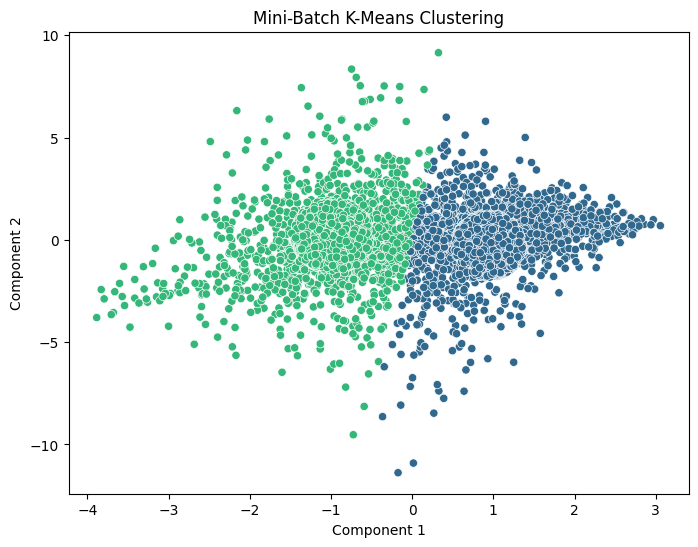

In [5]:
# Visualize Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=mbkmeans_labels, palette="viridis", legend=None)
plt.title("Mini-Batch K-Means Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Gausian Mixture Model

In [6]:
print("Running Gaussian Mixture Model (GMM) Clustering...")
with tqdm(total=1, desc="GMM") as pbar:
    gmm = GaussianMixture(n_components=2, random_state=42)
    gmm_labels = gmm.fit_predict(features)
    pbar.update(1)

# Compute silhouette score
sil_score = silhouette_score(features, gmm_labels)
print(f"Silhouette Score: {sil_score:.4f}")

# Save results
np.save("cluster_gmm.npy", gmm_labels)
print("GMM clustering saved successfully.")

# Save K-Means model
joblib.dump(gmm, "gmm.pkl")
print(f"✅ Saved K-Means model to gmm.pkl")

Running Gaussian Mixture Model (GMM) Clustering...


GMM: 100%|██████████| 1/1 [00:00<00:00, 19.25it/s]


Silhouette Score: 0.5003
GMM clustering saved successfully.
✅ Saved K-Means model to gmm.pkl


Plot

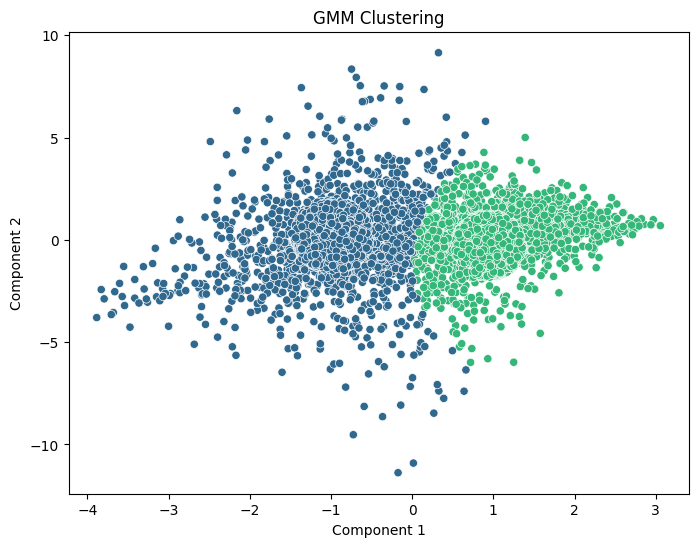

In [7]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=gmm_labels, palette="viridis", legend=None)
plt.title("GMM Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

Hierarchical Clustering

In [8]:
'''
hierarchical = AgglomerativeClustering(n_clusters=2)
hierarchical_labels = hierarchical.fit_predict(features)

sil_score = silhouette_score(features, hierarchical_labels)
print(f"Silhouette Score: {sil_score:.4f}")

np.save("cluster_hierarchical.npy", hierarchical_labels)
'''

'\nhierarchical = AgglomerativeClustering(n_clusters=2)\nhierarchical_labels = hierarchical.fit_predict(features)\n\nsil_score = silhouette_score(features, hierarchical_labels)\nprint(f"Silhouette Score: {sil_score:.4f}")\n\nnp.save("cluster_hierarchical.npy", hierarchical_labels)\n'

Plot

In [9]:
'''
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=hierarchical_labels, palette="viridis", legend=None)
plt.title("Hierarchical Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()
'''

'\nplt.figure(figsize=(8, 6))\nsns.scatterplot(x=features[:, 0], y=features[:, 1], hue=hierarchical_labels, palette="viridis", legend=None)\nplt.title("Hierarchical Clustering")\nplt.xlabel("Component 1")\nplt.ylabel("Component 2")\nplt.show()\n'

DBSCAN

In [10]:
print("Running DBSCAN Clustering...")
with tqdm(total=1, desc="DBSCAN") as pbar:
    dbscan = hdbscan.HDBSCAN(min_cluster_size=100)
    dbscan_labels = dbscan.fit_predict(features)
    pbar.update(1)

# Compute silhouette score (only if DBSCAN finds more than 1 cluster)
if len(set(dbscan_labels)) > 1:
    sil_score = silhouette_score(features, dbscan_labels)
    print(f"Silhouette Score: {sil_score:.4f}")
else:
    print("DBSCAN found only one cluster, silhouette score not applicable.")

# Save results
np.save("cluster_dbscan.npy", dbscan_labels)
print("DBSCAN clustering saved successfully.")

# Save K-Means model
joblib.dump(dbscan, "dbscan.pkl")
print(f"✅ Saved K-Means model to dbscan.pkl")

Running DBSCAN Clustering...


DBSCAN:   0%|          | 0/1 [00:00<?, ?it/s]e:\Coding\Advanced ML\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
e:\Coding\Advanced ML\.venv\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
DBSCAN: 100%|██████████| 1/1 [00:02<00:00,  2.35s/it]


Silhouette Score: 0.5038
DBSCAN clustering saved successfully.
✅ Saved K-Means model to dbscan.pkl


Plot

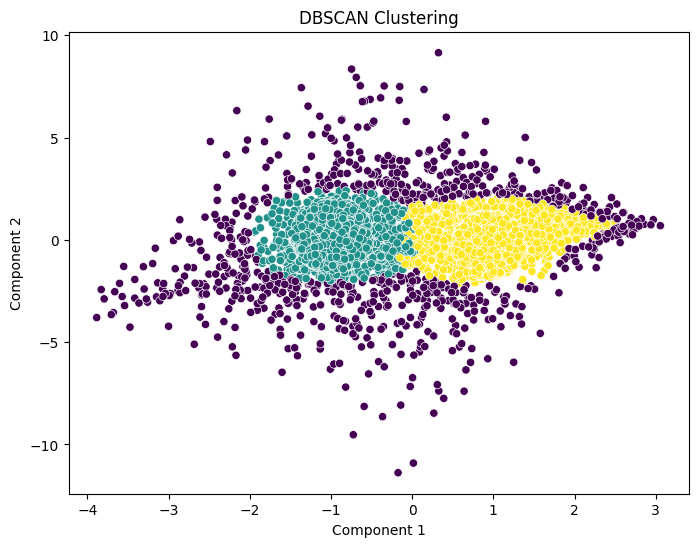

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=features[:, 0], y=features[:, 1], hue=dbscan_labels, palette="viridis", legend=None)
plt.title("DBSCAN Clustering")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.show()

In [12]:
print("Clustering completed and results saved.")

Clustering completed and results saved.


In [13]:
import numpy as np
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

# Load features from PCA or Autoencoder
features = np.load("pca.npy")  # Change to "pca.npy" or "umap.npy" if needed

# List of clustering results
cluster_files = ["cluster_dbscan.npy", "cluster_gmm.npy", "cluster_kmeans.npy", "cluster_mbkmeans.npy"]

# Compute scores for each clustering result
for cluster_file in cluster_files:
    cluster_labels = np.load(cluster_file)
    
    # Check if clustering produced valid clusters
    if len(set(cluster_labels)) > 1:  # Must have more than one cluster
        dbi_score = davies_bouldin_score(features, cluster_labels)
        chi_score = calinski_harabasz_score(features, cluster_labels)

        print(f"Results for {cluster_file}:")
        print(f"  Davies-Bouldin Index: {dbi_score:.4f}")
        print(f"  Calinski-Harabasz Index: {chi_score:.4f}\n")
    else:
        print(f"Skipping {cluster_file} (only one cluster found).")


Results for cluster_dbscan.npy:
  Davies-Bouldin Index: 2.6124
  Calinski-Harabasz Index: 34273.8657

Results for cluster_gmm.npy:
  Davies-Bouldin Index: 0.3664
  Calinski-Harabasz Index: 94700.4311

Results for cluster_kmeans.npy:
  Davies-Bouldin Index: 0.3656
  Calinski-Harabasz Index: 96184.3735

Results for cluster_mbkmeans.npy:
  Davies-Bouldin Index: 0.3655
  Calinski-Harabasz Index: 96237.4295

